In [ ]:
import sys
sys.path.append("../../")
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
with open("./S0-DN-eval.pkl", "rb") as f:
    sim_tracker_DN = pickle.load(f)
with open("./S0-revisit-evel.pkl", "rb") as f:
    sim_tracker_revisit = pickle.load(f)
    
with open("./S0-smart-random-eval.pkl", "rb") as f:
    sim_tracker_random = pickle.load(f)
    
    
SIMS = [sim_tracker_random, sim_tracker_revisit]
labels = ['Random', '90-min Revisit']

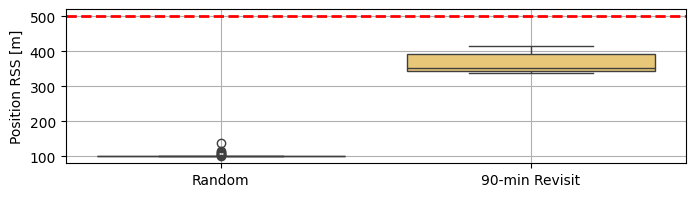

In [24]:

data = []

for sim in SIMS:
    data.append(sim.uncertainty_static)

plt.figure(figsize=(8, 2))
sns.boxplot(data=data ,color="#FBD065")
plt.axhline(y=np.mean(sim_tracker_DN.uncertainty_static), color='red', linestyle='--', linewidth=2)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('Position RSS [m]')
plt.grid()
plt.show()